# Document Details and imports


 


```
**CREATED BY - Razia patel
Date-16 feb23
CODE related to - Assignment2 Topics: Descriptive Statistics and Probability based on statistical concepts level2 related to datascience.**
version 1.0

```

In [1]:
#import the libraries
import pandas as pd
import scipy.stats  as stats
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import median
from numpy import std
from numpy import var
from numpy import percentile


# SET 1


Q1 )Look at the data given below. Plot the data, find the outliers and find out  μ,σ,σ^2 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


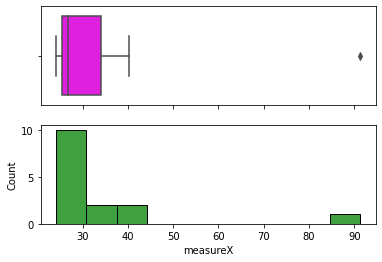

====values of μ,σ,σ^2 before removing outliers====
MEAN = 33.27133333333333
Median = 26.71
std deviation = 16.370812590976932
variance =268.00350488888887


In [2]:
datameasurex=[24.14,24.23,24.39,39.42,40.26,91.36,25.41,25.53,25.81,25.99,26.71,28.25,29.62,32.95,35]
dfMeasureX =pd.DataFrame(datameasurex,columns=['measureX'])
#print(sns.histplot(dfMeasureX))
#sns.set(style='darkgrid')
#sns.boxplot(x=dfMeasureX['measureX'],color='magenta')   # identifying the outliers
#plt.show()
# plotting both histplot and boxplot together for better representation and analysis.
f, (ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.50, .50)})# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
sns.boxplot(dfMeasureX['measureX'], ax=ax_box,color='magenta') # object of boxplot
sns.histplot(data=dfMeasureX['measureX'], ax=ax_hist,color='green') # object of histplot 
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()
print('====values of μ,σ,σ^2 before removing outliers====')
print('MEAN = '+ str(mean(dfMeasureX.measureX)))
print('Median = '+str(median(dfMeasureX.measureX)))
print('std deviation = '+str(std(dfMeasureX.measureX)))
print('variance ='+str(var(dfMeasureX.measureX)))


As per the histogram plot and  boxplot there exist ouliers hence using boxplot to set the upper limit ,anything above the upperfence = Q3+1.5*IQR=46.7325 is an oultier.

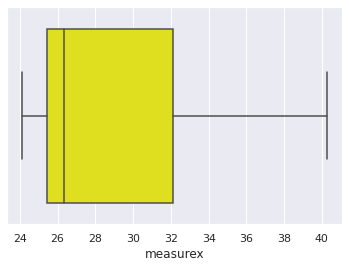

====values of μ,σ,σ^2 after removing outliers====
MEAN = 29.122142857142855
Median = 26.35
std deviation = 5.376791633056476
variance =28.909888265306126


In [3]:
#identifying and removing outliers through code
#print(dfMeasureX.describe())
Q3=percentile(dfMeasureX['measureX'],75)
Q2=percentile(dfMeasureX['measureX'],25)
IQR=Q3 - Q2
#IQR = percentile(dfMeasureX['measureX'],0.75) - (dfMeasureX['measureX'],0.25)
#print(IQR)   
upperlimit= Q3+1.5*IQR
#print(upperlimit)
outlierremoved=[x for x in dfMeasureX['measureX'] if x < upperlimit]
dfoutlierremoved = pd.DataFrame(outlierremoved,columns=['measurex'])
#dfoutlierremoved.head(14) # confirming if data sis clean

# confirming data sanity from boxplot
sns.set(style='darkgrid')
sns.boxplot(x=dfoutlierremoved['measurex'],color='yellow')   # identifying if still after datacleaning  the outliers exists
plt.show()
print('====values of μ,σ,σ^2 after removing outliers====')
print('MEAN = '+ str(mean(dfoutlierremoved.measurex)))
print('Median = '+str(median(dfoutlierremoved.measurex)))
print('std deviation = '+str(std(dfoutlierremoved.measurex)))
print('variance ='+str(var(dfoutlierremoved.measurex)))

# SET 2 

1.	The time required for servicing transmissions is normally distributed with  = 45 minutes and  = 8 minutes. The service manager plans to have work begin on the transmission of a customer’s car 10 minutes after the car is dropped off and the customer is told that the car will be ready within 1 hour from drop-off. What is the probability that the service manager cannot meet his commitment? 

In [4]:
plessthan50 =stats.norm.cdf(50,45,8) # since 10 mins delay in start work hence 60-10=55
pgreaterthan50 = 1-plessthan50 
print(pgreaterthan50)  

0.26598552904870054


2.	The current age (in years) of 400 clerical employees at an insurance claims processing center is normally distributed with mean  = 38 and Standard deviation  =6. For each statement below, please specify True/False. If false, briefly explain why.
More employees at the processing center are older than 44 than between 38 and 44. 
> A.	A training program for employees under the age of 30 at the center would be expected to attract about 36 employees.


In [5]:
# TO find the area of p(x greaterthan 44)  
plessthan44 = stats.norm.cdf(44,38,6)  
#print()
pgreatthan44 =(1-plessthan44)*100  
print('percentage of employees at the processing center are older than 44 = '+ str(pgreatthan44)+'%'  )  
pbet44and38 = (plessthan44 -0.5)*100
print('percentage of employees at the processing center are between 38 and 44. = '+ str(pbet44and38)+'%'  )  


percentage of employees at the processing center are older than 44 = 15.865525393145708%
percentage of employees at the processing center are between 38 and 44. = 34.13447460685429%


In [6]:
# percentage of employees under the age of 30 at the center 
plessthan30 = stats.norm.cdf(30,38,6) *100 
print('percentage of employees under the age of 30 at the center  = '+ str(plessthan30)+'%')  

nosofemployees = plessthan30* 400/100  
print('number of employees under the age of 30 at the center  = '+ str(nosofemployees))  


percentage of employees under the age of 30 at the center  = 9.121121972586788%
number of employees under the age of 30 at the center  = 36.484487890347154


ANS)   False  since as shown below the (cdf) probability of of employees at the processing center are older than 44  is  15%  than between 38 and 44 which is  34%
> A) A training program for employees under the age of 30 at the center would be expected to attract about 36 employees. - TRUE 

4.	Let X ~ N(100, 20square). Find two values, a and b, symmetric about the mean, such that the probability of the random variable taking a value between them is 0.99.   

In [7]:
rightvalue99 = stats.norm.ppf(0.995,100,20)  # right limit ppf takes value percent+a/2 
leftvalue= stats.norm.ppf(0.005,100,20) # left it will be a/2 where a =significant value
print(rightvalue99)  
print(leftvalue)  


151.516586070978
48.483413929021985


5.	Consider a company that has two different divisions. The annual profits from the two divisions are independent and have distributions Profit1 ~ N(5, 3sqare)  = N(225, 135sqare)  and Profit2 ~ N(7 = 315, 4= 180square) respectively. Both the profits are in $ Million. Answer the following questions about the total profit of the company in Rupees. Assume that $1 = Rs. 45

> A.	Specify a Rupee range (centered on the mean) such that it contains 95% probability for the annual profit of the company.
> B.	Specify the 5th percentile of profit (in Rupees) for the company
[HINT ; INORDER TO FIND THE FIFTH PERCENTILE FROM THE LEFT SIDE WE NEED TO FIND THE DIFFERENCE FROM THE MEAN AND THE 1.5 TH PART OF STD DEVIATION.]
> C.	Which of the two divisions has a larger probability of making a loss in a given year?


In [8]:
# FOR COMPANY A
Arightvalue95 = stats.norm.ppf(0.975,225,135)  # right limit ppf takes value percent+a/2 where a/2=2.5 
Aleftvalue95= stats.norm.ppf(0.025,315,180) # left it will be a/2 where a =significant value
print('for first company the Rupee range in millions(centered on the mean) such that it contains 95% probability for the annual profit is between [ '+ str(Aleftvalue95) +',' + str(Arightvalue95))  
#print()  
# FOR COMPANY B
Brightvalue95 = stats.norm.ppf(0.975,315,180)  # right limit ppf takes value percent+a/2 where a/2=2.5 
Bleftvalue= stats.norm.ppf(0.025,315,180) # left it will be a/2 where a =significant value
print('for SECOND company the Rupee range in millions(centered on the mean) such that it contains 95% probability for the annual profit is between [ '+ str(Bleftvalue) +',' + str(Brightvalue95))  
#print()  


for first company the Rupee range in millions(centered on the mean) such that it contains 95% probability for the annual profit is between [ -37.793517217209796,489.5951379129073
for SECOND company the Rupee range in millions(centered on the mean) such that it contains 95% probability for the annual profit is between [ -37.793517217209796,667.7935172172097


# SET 4

3.	Auditors at a small community bank randomly sample 100 withdrawal transactions made during the week at an ATM machine located near the bank’s main branch. Over the past 2 years, the average withdrawal amount has been $50 with a standard deviation of $40. Since audit investigations are typically expensive, the auditors decide to not initiate further investigations if the mean transaction amount of the sample is between $45 and $55. What is the probability that in any given week, there will be an investigation?

In [15]:
prdiff=(stats.norm.cdf(55,50,40) - stats.norm.cdf(45,50,40))*100 
print('probability that in any given week there will be an investigation= '  +str(prdiff) + '%') 

probability that in any given week there will be an investigation= 9.947644966022583%
